In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lombardia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,40.964
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.792
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,58.233
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,36.676
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,17.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020-11-24T17:00:00,3,Lombardia,8360,932,9292,139468,148760,-1158,4886,...,186.0,31033.0,11380.0,-1174.0,10.03,6.25,15.74,42.93,-1.38,3.259
274,2020-11-25T17:00:00,3,Lombardia,8114,942,9056,128973,138029,-10731,5173,...,155.0,42063.0,14856.0,-10495.0,10.40,6.56,12.30,34.82,1.07,3.477
275,2020-11-26T17:00:00,3,Lombardia,7996,934,8930,131471,140401,2372,5697,...,207.0,44231.0,15288.0,2498.0,10.46,6.36,12.88,37.26,-0.85,4.127
276,2020-11-27T17:00:00,3,Lombardia,7869,925,8794,121761,130555,-9846,5389,...,181.0,40931.0,15121.0,-9710.0,10.52,6.74,13.17,35.64,-0.96,3.838


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 28, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 4615
Nuovi tamponi: 37286.0
Percentuale nuovi positivi/nuovi tamponi: 12.4 %
Nuovi guariti: 4736.0
Nuovi deceduti: 119.0
Variazione positivi ricoverati con sintomi: -253.0
Variazione positivi in terapia intensiva: -6.0
Variazione positivi in isolamento dimiciliare: 19.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 28, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-29T17:00:00,3,Lombardia,315,33,348,8751,9099,-235,203,...,3.0,13791.0,9958.0,-246.0,9.48,3.82,1.47,2.04,6.45,2.175
1,2020-09-30T17:00:00,3,Lombardia,306,34,340,8720,9060,-39,201,...,4.0,18804.0,11730.0,-31.0,10.00,3.75,1.07,1.71,3.03,2.209
2,2020-10-01T17:00:00,3,Lombardia,298,35,333,8834,9167,107,324,...,5.0,24691.0,16044.0,114.0,10.51,3.63,1.31,2.02,2.94,3.576
3,2020-10-02T17:00:00,3,Lombardia,302,39,341,8825,9166,-1,307,...,4.0,19842.0,12270.0,-9.0,11.44,3.72,1.55,2.50,11.43,3.349
4,2020-10-03T17:00:00,3,Lombardia,293,42,335,8827,9162,-4,393,...,5.0,18860.0,12096.0,2.0,12.54,3.66,2.08,3.25,7.69,4.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-24T17:00:00,3,Lombardia,8360,932,9292,139468,148760,-1158,4886,...,186.0,31033.0,11380.0,-1174.0,10.03,6.25,15.74,42.93,-1.38,3.259
57,2020-11-25T17:00:00,3,Lombardia,8114,942,9056,128973,138029,-10731,5173,...,155.0,42063.0,14856.0,-10495.0,10.40,6.56,12.30,34.82,1.07,3.477
58,2020-11-26T17:00:00,3,Lombardia,7996,934,8930,131471,140401,2372,5697,...,207.0,44231.0,15288.0,2498.0,10.46,6.36,12.88,37.26,-0.85,4.127
59,2020-11-27T17:00:00,3,Lombardia,7869,925,8794,121761,130555,-9846,5389,...,181.0,40931.0,15121.0,-9710.0,10.52,6.74,13.17,35.64,-0.96,3.838


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

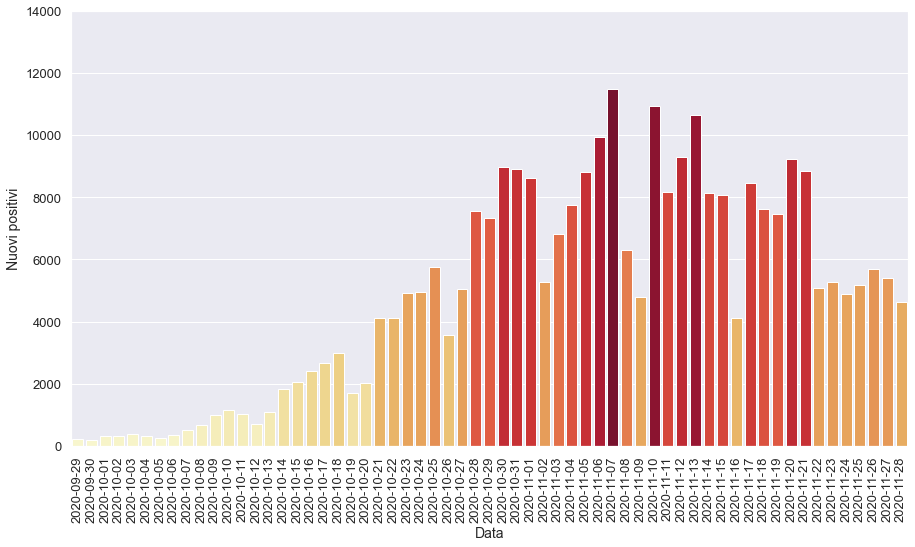

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

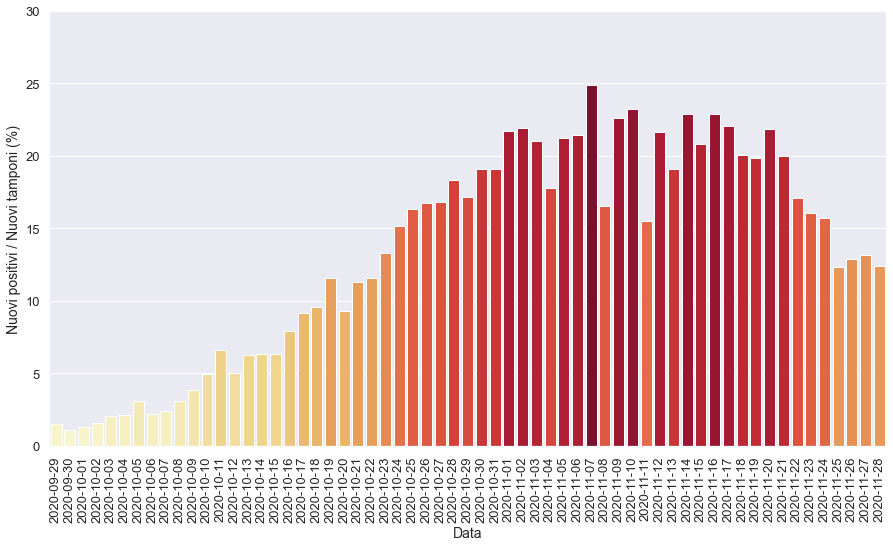

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

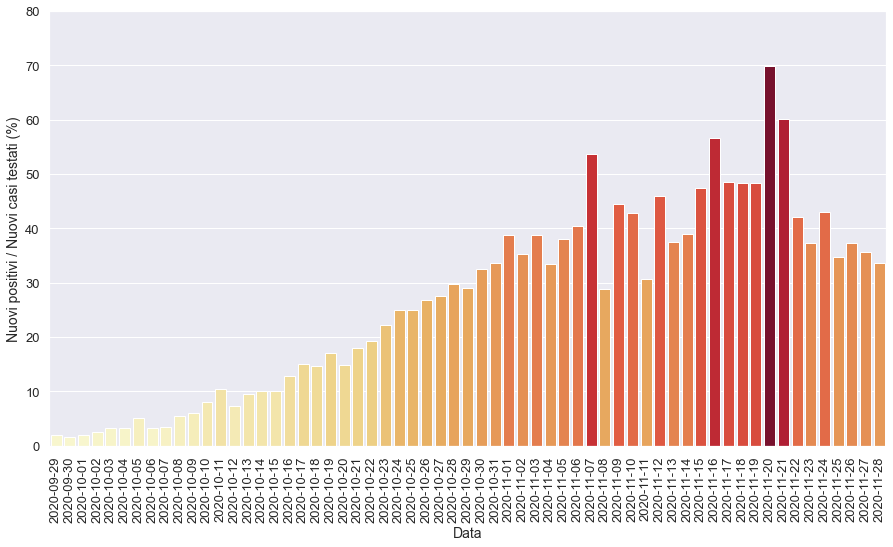

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

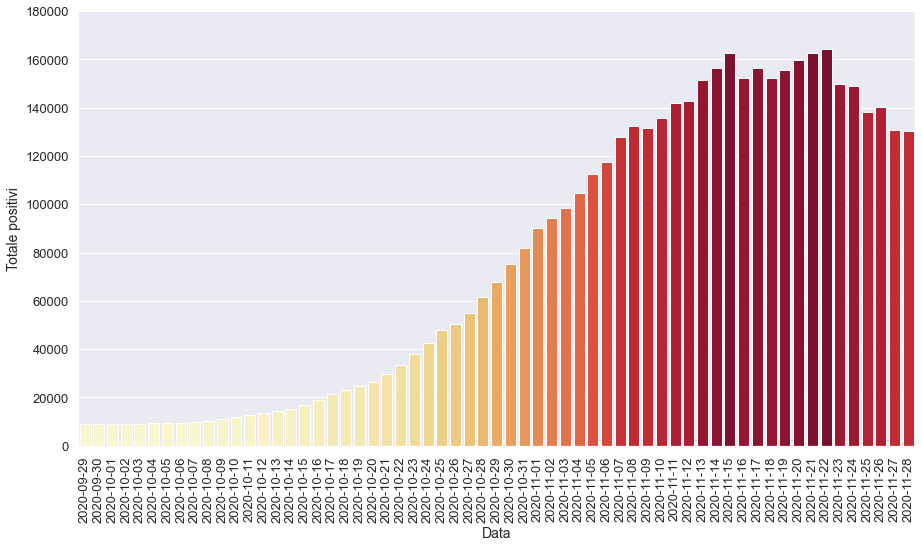

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

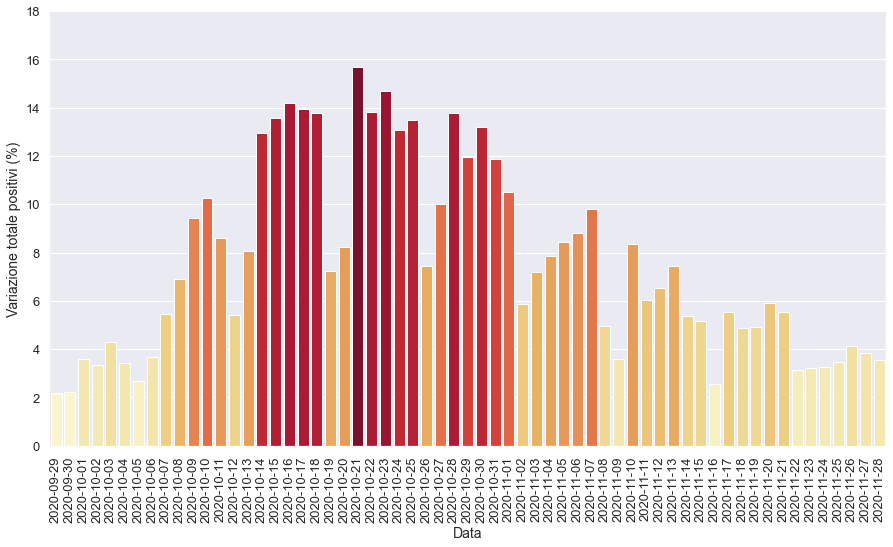

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

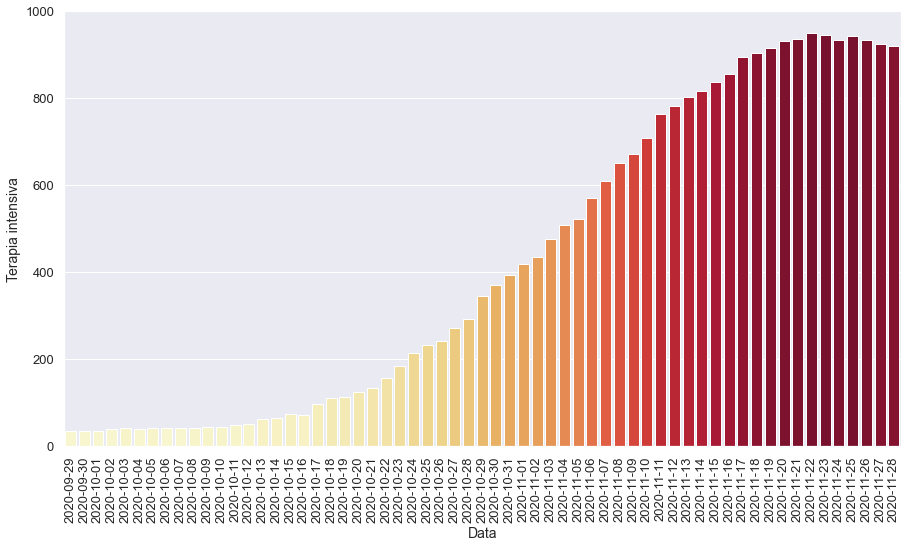

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

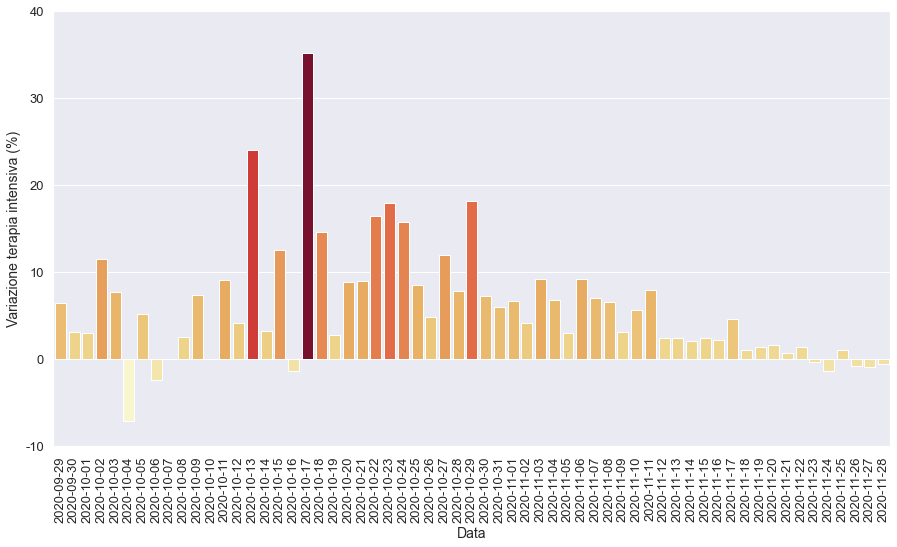

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

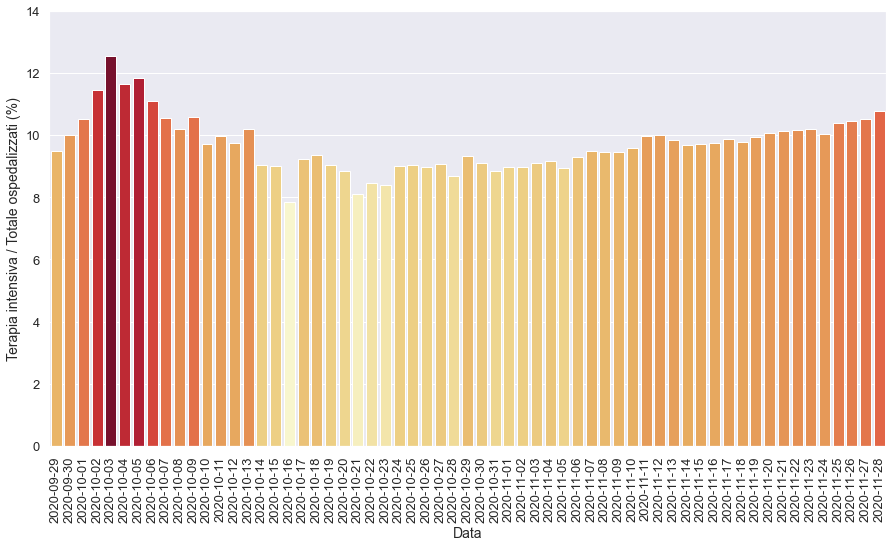

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

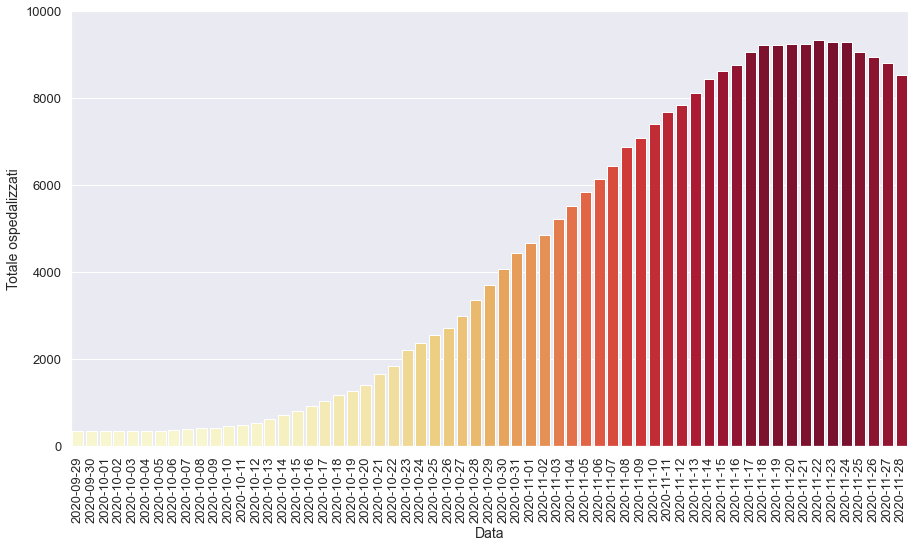

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

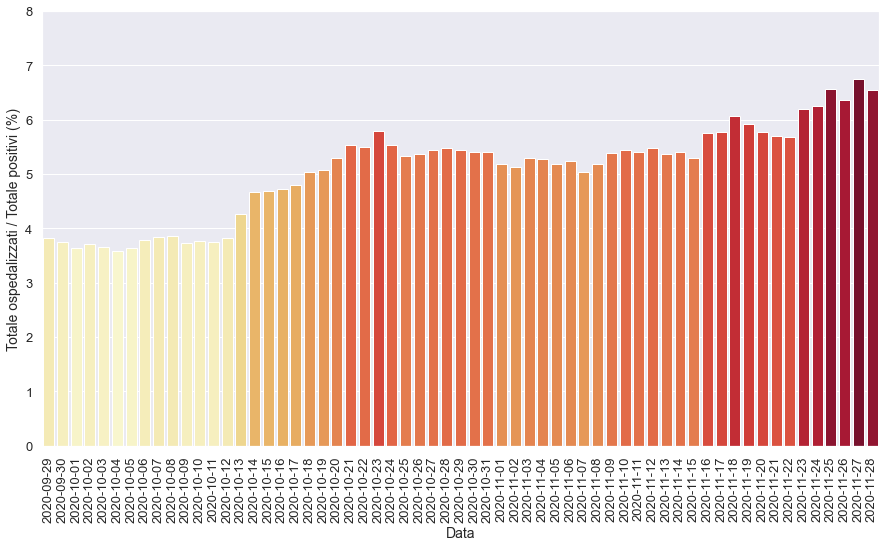

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

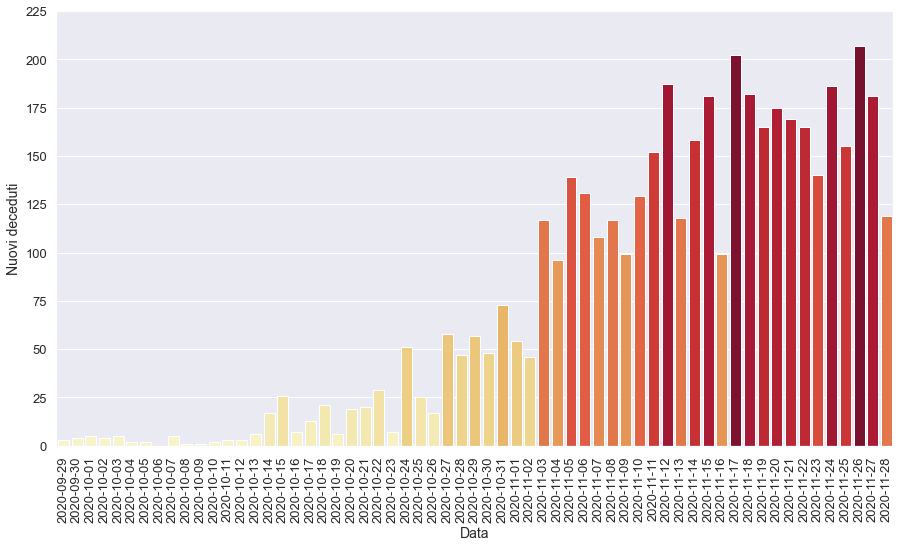

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

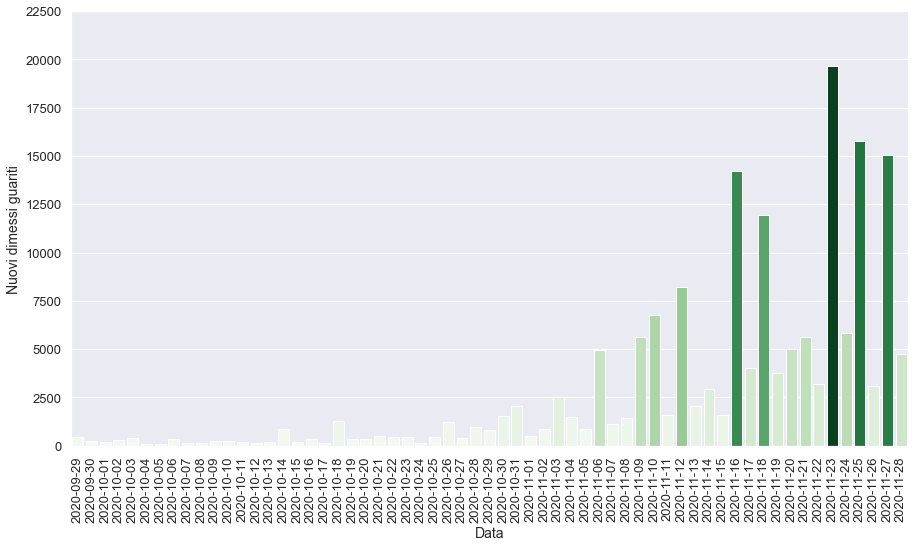

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-29T17:00:00,3,Lombardia,3355,345,3700,64184,67884,6478,7339,...,57.0,42684.0,25221.0,6142.0,9.32,5.45,17.19,29.10,18.15,11.952
1,2020-10-30T17:00:00,3,Lombardia,3698,370,4068,71161,75229,7345,8960,...,48.0,46892.0,27579.0,6977.0,9.10,5.41,19.11,32.49,7.25,13.199
2,2020-10-31T17:00:00,3,Lombardia,4033,392,4425,77586,82011,6782,8919,...,73.0,46781.0,26476.0,6425.0,8.86,5.40,19.07,33.69,5.95,11.856
3,2020-11-01T17:00:00,3,Lombardia,4246,418,4664,85411,90075,8064,8607,...,54.0,39658.0,22224.0,7825.0,8.96,5.18,21.70,38.73,6.63,10.495
4,2020-11-02T17:00:00,3,Lombardia,4406,435,4841,89577,94418,4343,5278,...,46.0,24087.0,14954.0,4166.0,8.99,5.13,21.91,35.29,4.07,5.860
5,2020-11-03T17:00:00,3,Lombardia,4740,475,5215,93351,98566,4148,6804,...,117.0,32337.0,17578.0,3774.0,9.11,5.29,21.04,38.71,9.20,7.206
6,2020-11-04T17:00:00,3,Lombardia,5018,507,5525,99208,104733,6167,7758,...,96.0,43716.0,23235.0,5857.0,9.18,5.28,17.75,33.39,6.74,7.871
7,2020-11-05T17:00:00,3,Lombardia,5318,522,5840,106684,112524,7791,8822,...,139.0,41544.0,23167.0,7476.0,8.94,5.19,21.24,38.08,2.96,8.423
8,2020-11-06T17:00:00,3,Lombardia,5563,570,6133,111233,117366,4842,9934,...,131.0,46401.0,24570.0,4549.0,9.29,5.23,21.41,40.43,9.20,8.828
9,2020-11-07T17:00:00,3,Lombardia,5813,610,6423,121206,127629,10263,11489,...,108.0,46099.0,21420.0,9973.0,9.50,5.03,24.92,53.64,7.02,9.789


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

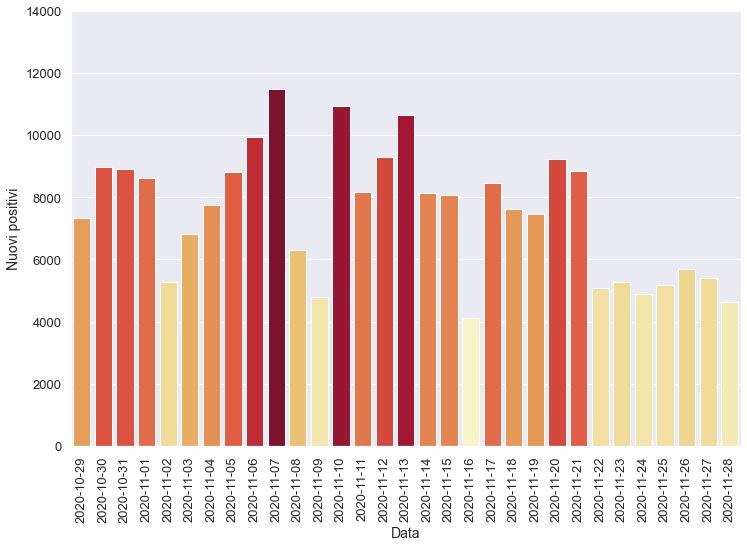

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

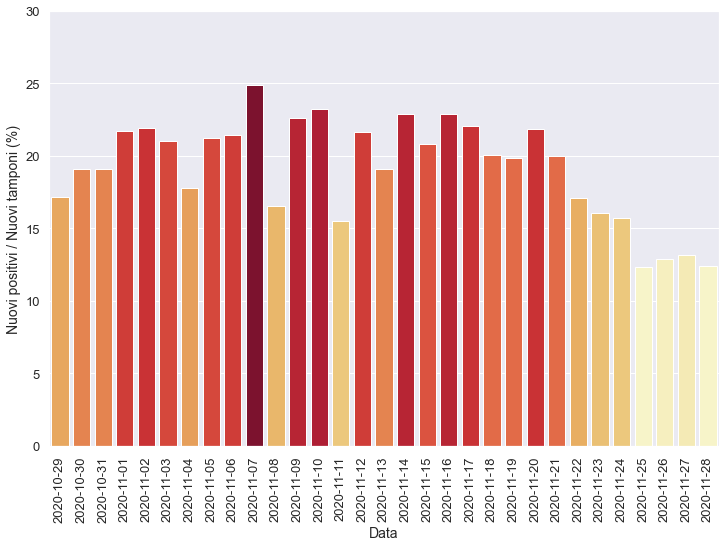

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

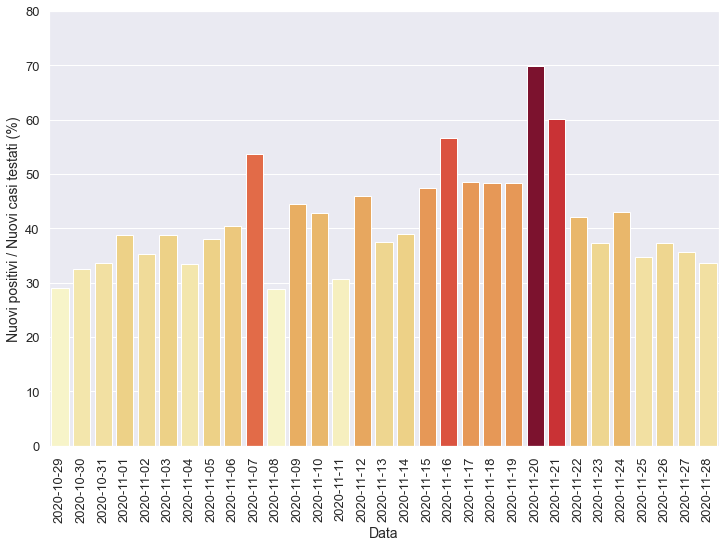

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

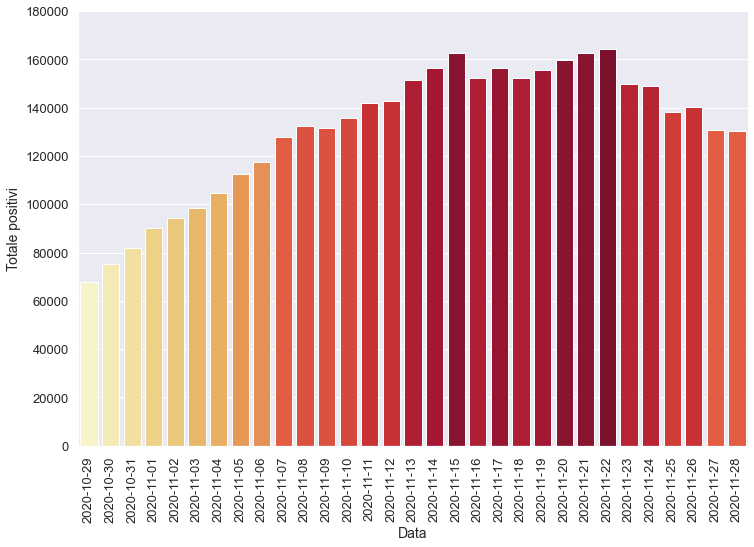

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

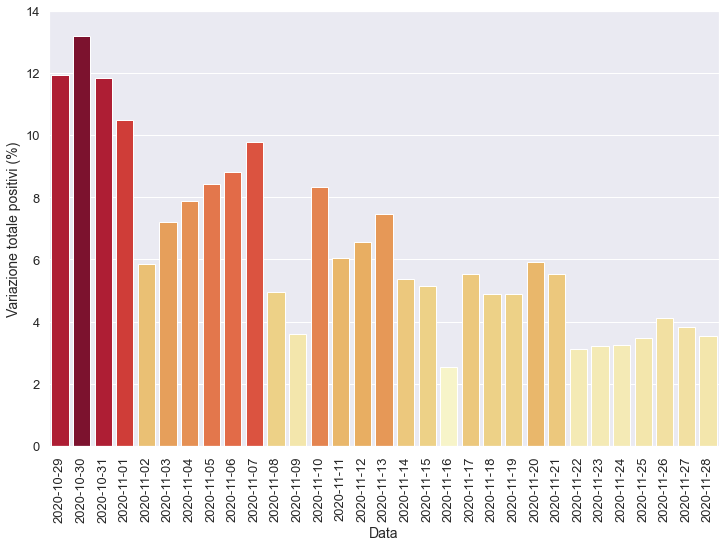

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

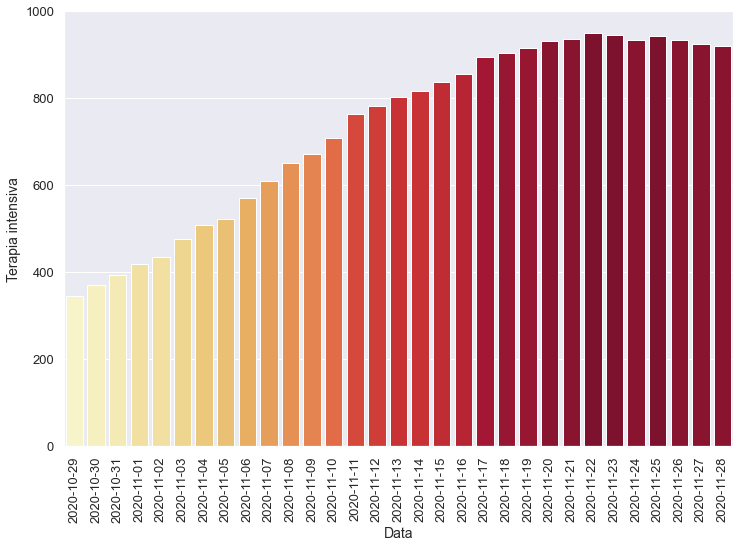

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

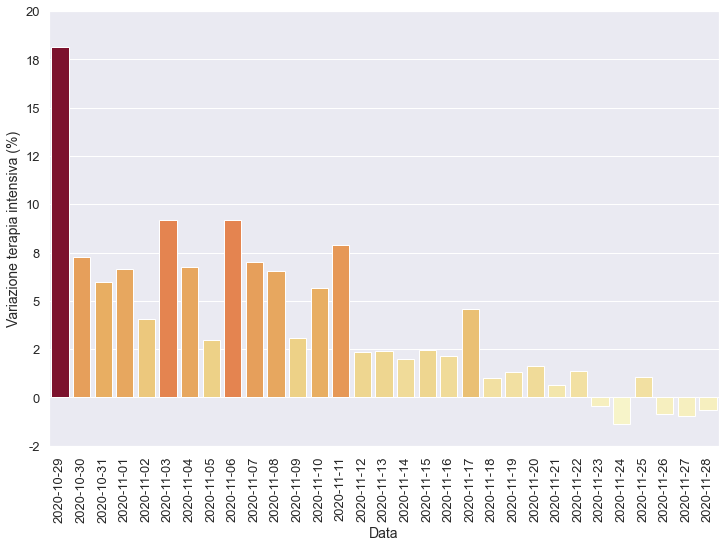

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

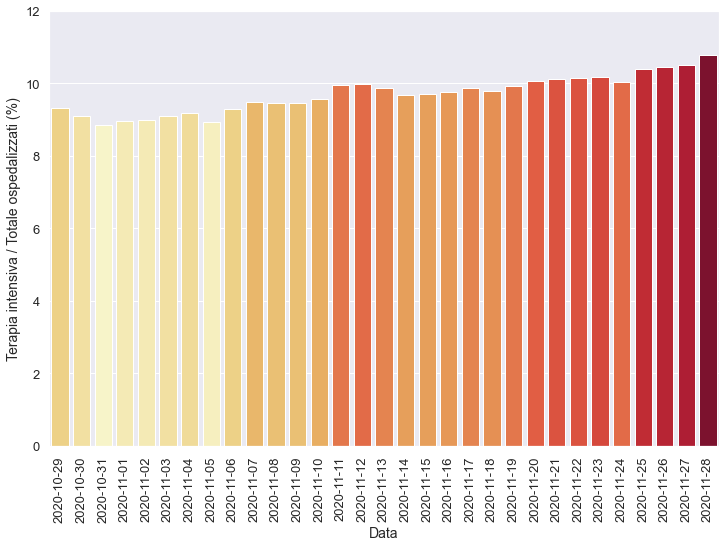

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

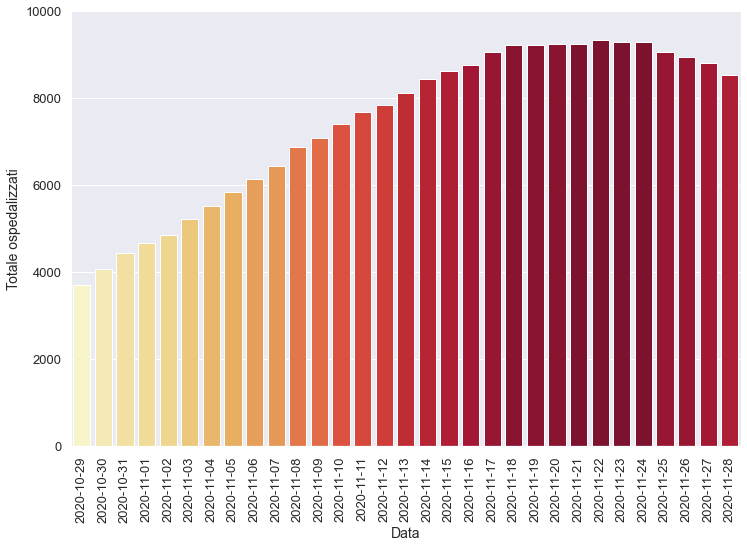

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

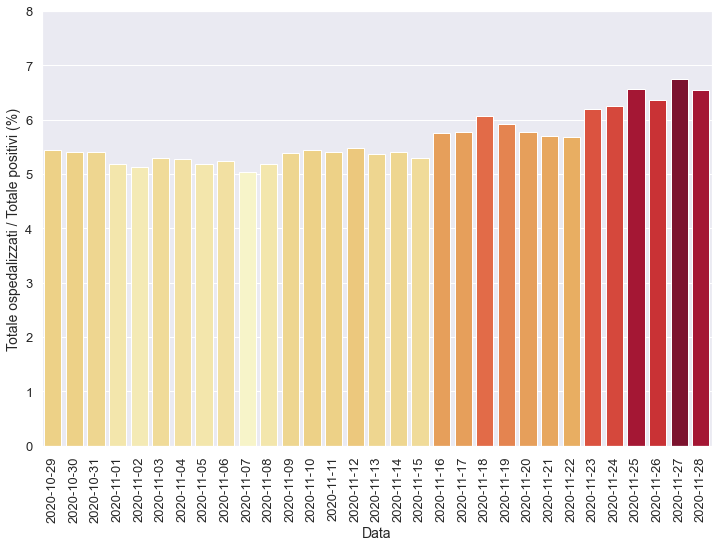

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

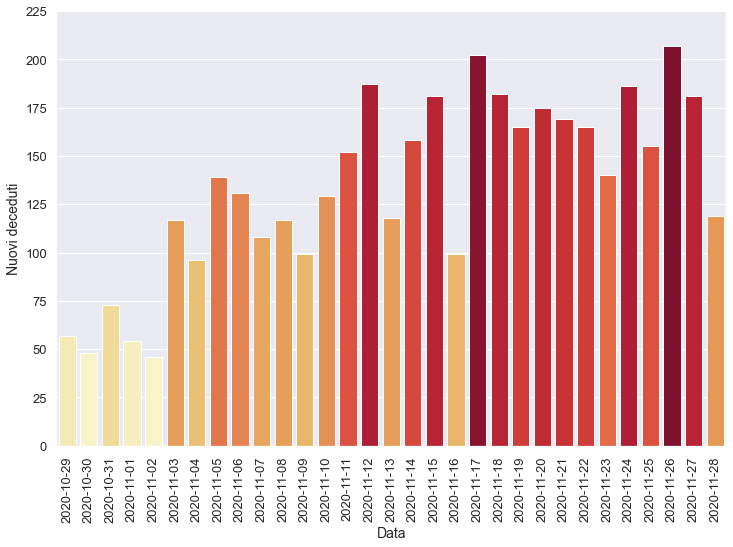

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

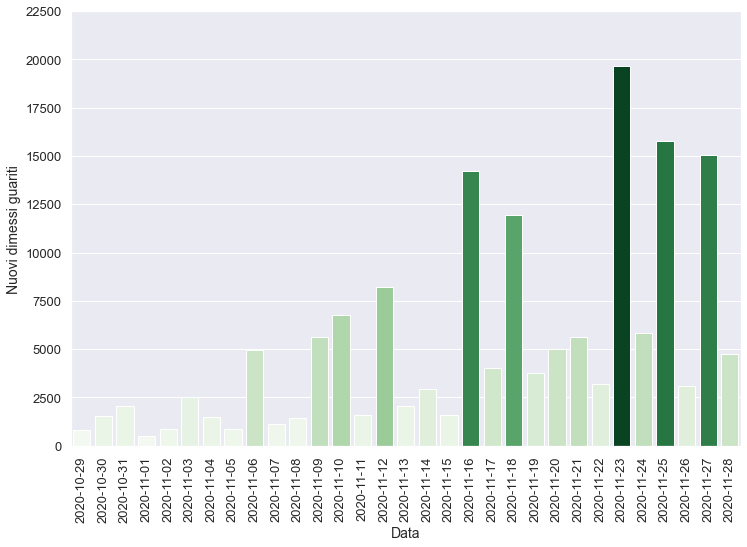

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-21T17:00:00,3,Lombardia,8314,936,9250,153435,162685,3044,8853,...,169.0,44294.0,14741.0,3028.0,10.12,5.69,19.99,60.06,0.65,5.546
1,2020-11-22T17:00:00,3,Lombardia,8391,949,9340,155066,164406,1721,5094,...,165.0,29800.0,12117.0,1631.0,10.16,5.68,17.09,42.04,1.39,3.131
2,2020-11-23T17:00:00,3,Lombardia,8331,945,9276,140642,149918,-14488,5289,...,140.0,32862.0,14172.0,-14424.0,10.19,6.19,16.09,37.32,-0.42,3.217
3,2020-11-24T17:00:00,3,Lombardia,8360,932,9292,139468,148760,-1158,4886,...,186.0,31033.0,11380.0,-1174.0,10.03,6.25,15.74,42.93,-1.38,3.259
4,2020-11-25T17:00:00,3,Lombardia,8114,942,9056,128973,138029,-10731,5173,...,155.0,42063.0,14856.0,-10495.0,10.40,6.56,12.30,34.82,1.07,3.477
5,2020-11-26T17:00:00,3,Lombardia,7996,934,8930,131471,140401,2372,5697,...,207.0,44231.0,15288.0,2498.0,10.46,6.36,12.88,37.26,-0.85,4.127
6,2020-11-27T17:00:00,3,Lombardia,7869,925,8794,121761,130555,-9846,5389,...,181.0,40931.0,15121.0,-9710.0,10.52,6.74,13.17,35.64,-0.96,3.838
7,2020-11-28T17:00:00,3,Lombardia,7616,919,8535,121780,130315,-240,4615,...,119.0,37286.0,13715.0,19.0,10.77,6.55,12.38,33.65,-0.65,3.535


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

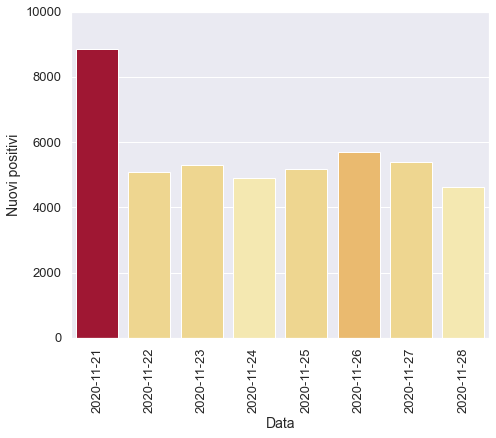

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

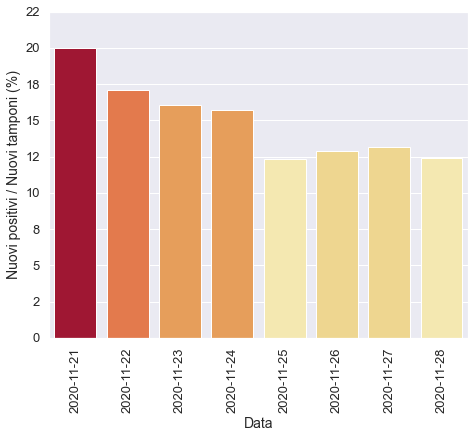

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

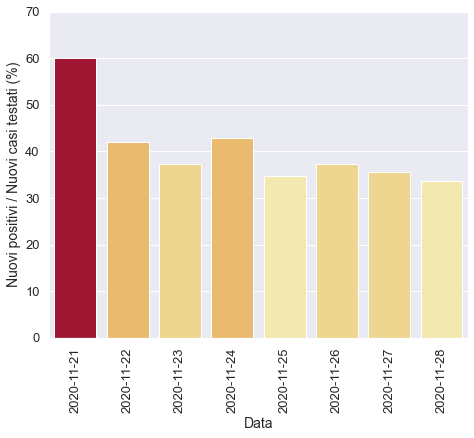

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

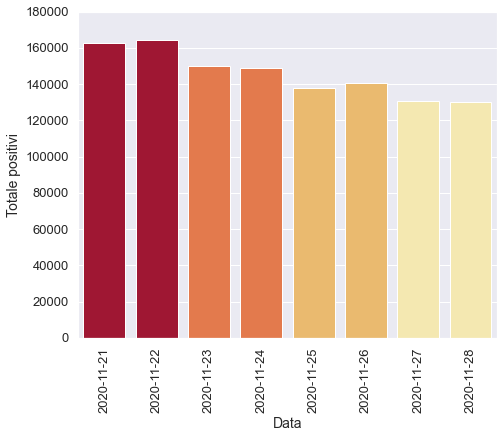

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

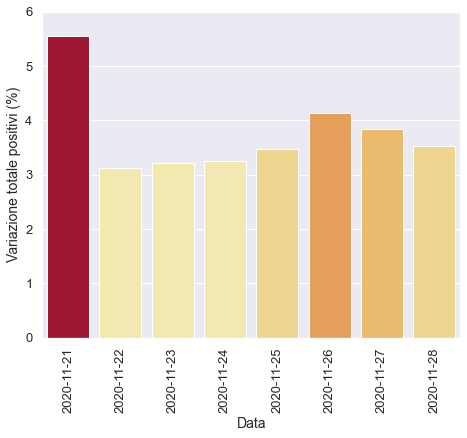

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

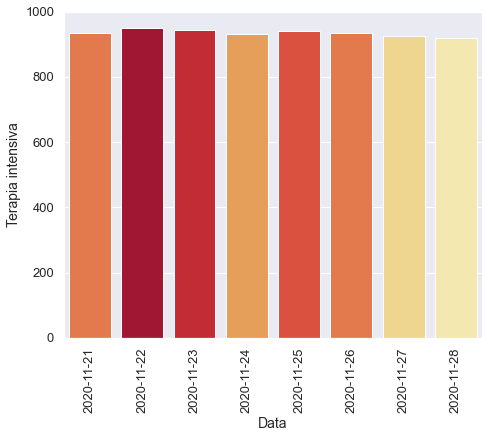

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

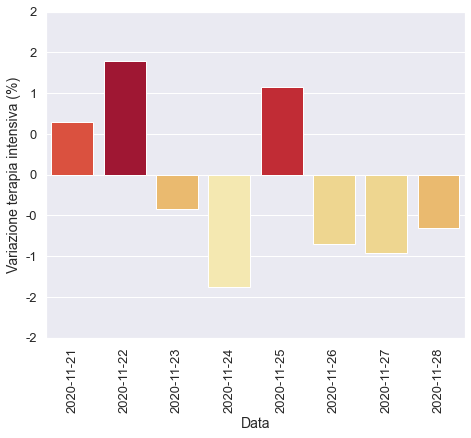

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

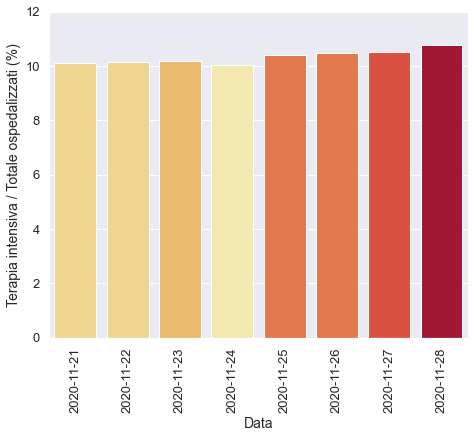

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

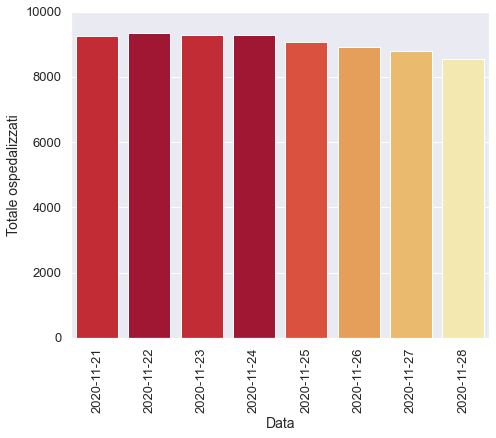

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

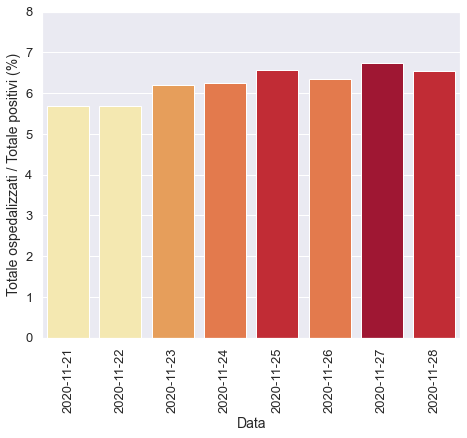

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

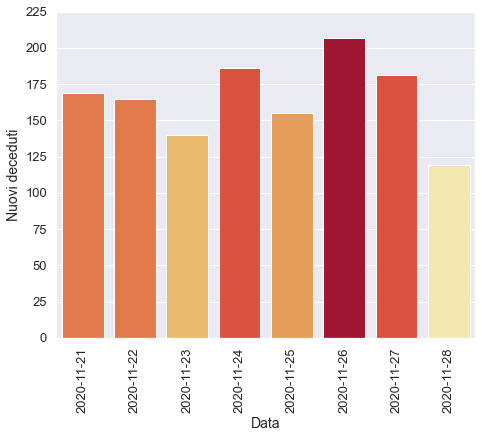

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

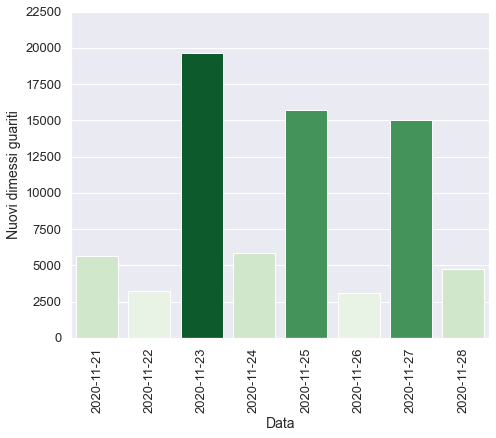

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)